In [1]:
import requests
import os

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance implementation)

def my_pca(X):
    n_points, n_features = X.T.shape #to get the number of samples and the number features of each sample
    mean = np.array([np.mean(X.T[:,i]) for i in range(n_features)]) #to get the mean matrix of feachures
    #Centralization
    cen_X = X.T-mean
    #empirical covariance matrix
    cov_matrix = np.dot(cen_X.T,cen_X)/(n_points-1)
    #then to calculate the eigenvectors and eigenvalues using np.linalg.eig, in the numpy 
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    res = {}
    for i in range(len(eig_val)):
        res[eig_val[i]] = eig_vec[i]
    
    return eig_val, eig_vec

# Test your implementation
# eigenvalue = [7.93954312 0.06045688]
# eigen vectors = [[ 0.83849224 -0.54491354]
#                  [ 0.54491354  0.83849224]]
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X.T
val, vec = my_pca(X)
print(val)
print(vec)


[7.93954312 0.06045688]
[[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)

def my_dual_pca(X):
    n_points, n_features = X.shape #to get the number of samples and the number features of each sample
    mean = np.array([np.mean(X[:,i]) for i in range(n_features)]) #to get the mean matrix of feachures
    #Centralization
    cen_X = X-mean
    #empirical covariance matrix
    cov_matrix = cen_X/pow(n_points-1,0.5)
    U,S,V = np.linalg.svd(cov_matrix)
    return np.square(S) ,V.T

# Test your implementation
# eigenvalue = [7.93954312 0.06045688]
# eigen vectors = [[ 0.83849224 -0.54491354]
#                  [ 0.54491354  0.83849224]]
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#X = X.T
val, vec = my_dual_pca(X)
print(val)
print(vec)

[7.93954312 0.06045688]
[[ 0.83849224  0.54491354]
 [ 0.54491354 -0.83849224]]


### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [5]:
# Import dataset
X = np.load('./Data/synthetic_data.npy', allow_pickle=True)


[[ 0.87668908  0.37697443 -0.29758506  0.02738013]
 [ 0.00153349 -0.54190783 -0.63086947  0.55528125]]
(150, 4)


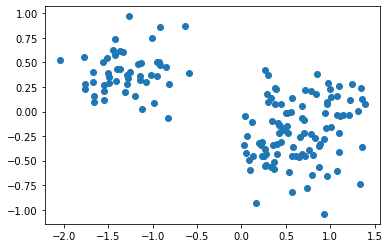

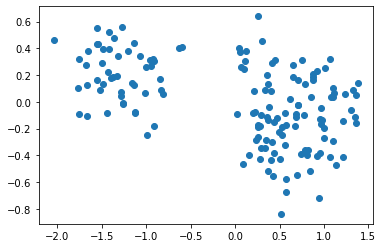

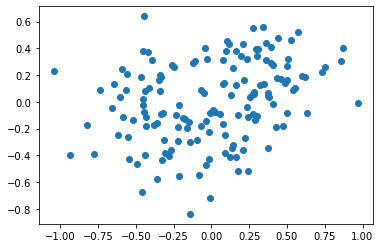

In [6]:
# Visualisation
val, vec = my_pca(X)
X=X.T
dic = {}
for i in range(len(val)):
    dic[val[i]] = vec[i]
ls = sorted(dic,reverse=True)
k = 2 # to select the first 2 principal components(pc1 pc2)
new_features = np.array([dic[e] for e in ls[:k]])
print(new_features)
n_points, n_features = X.shape
mean = np.array([np.mean(X[:,i]) for i in range(n_features)])
cen_X = X-mean
print(cen_X.shape)
data=np.dot(cen_X,np.transpose(new_features))
x=[]
y = []
x.append(data.T[0])
y.append(data.T[1])
# to select the first and the third principal components(pc1 pc3)
new_features_13 = np.array([dic[ls[0]],dic[ls[2]]])
data_13=np.dot(cen_X,np.transpose(new_features_13))
x.append(data_13.T[0])
y.append(data_13.T[1])
# to select the second and the third principal components(pc2 pc3)
new_features_23 = np.array([dic[ls[1]],dic[ls[2]]])
data_23=np.dot(cen_X,np.transpose(new_features_23))
x.append(data_23.T[0])
y.append(data_23.T[1])
# to show the data sets after PCA and being projected to 2D
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.show()

as demonstrated in the above pictures, with pc1,pc2 and pc1,pc3 data set can be  ideally devided into two parts which indicates that with the top  principal components data sets can be projected to low dimension without losing much information from higher dimension

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

In [7]:
X, _ = np.load(f'./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]

In [8]:
# Image compression
Yale_val,Yale_vec = my_dual_pca(train_X.T)
dic_img = {}
# to make a hashmap with Eigenvalue as key and its corresponding Eigenvector as valuse ordered reversely by Eigenvalue 
for i in range(len(Yale_val)):
    dic_img[Yale_val[i]] = Yale_vec[i]
Yale_val_sort = sorted(Yale_val,reverse=True)
#to get a proper dimension, I make use of Proportion of Variance 
s = 0
k = 1
for i in range(len(Yale_val_sort)):
    s += Yale_val_sort[i]
    if s/sum(Yale_val_sort) >= 0.9:
        k = i + 1
        break
print('the k number of top  principal components',k)



the k number of top  principal components 33


<ipython-input-9-380fc108f5e6>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(data_img_recon)/8+1,8,i+1)


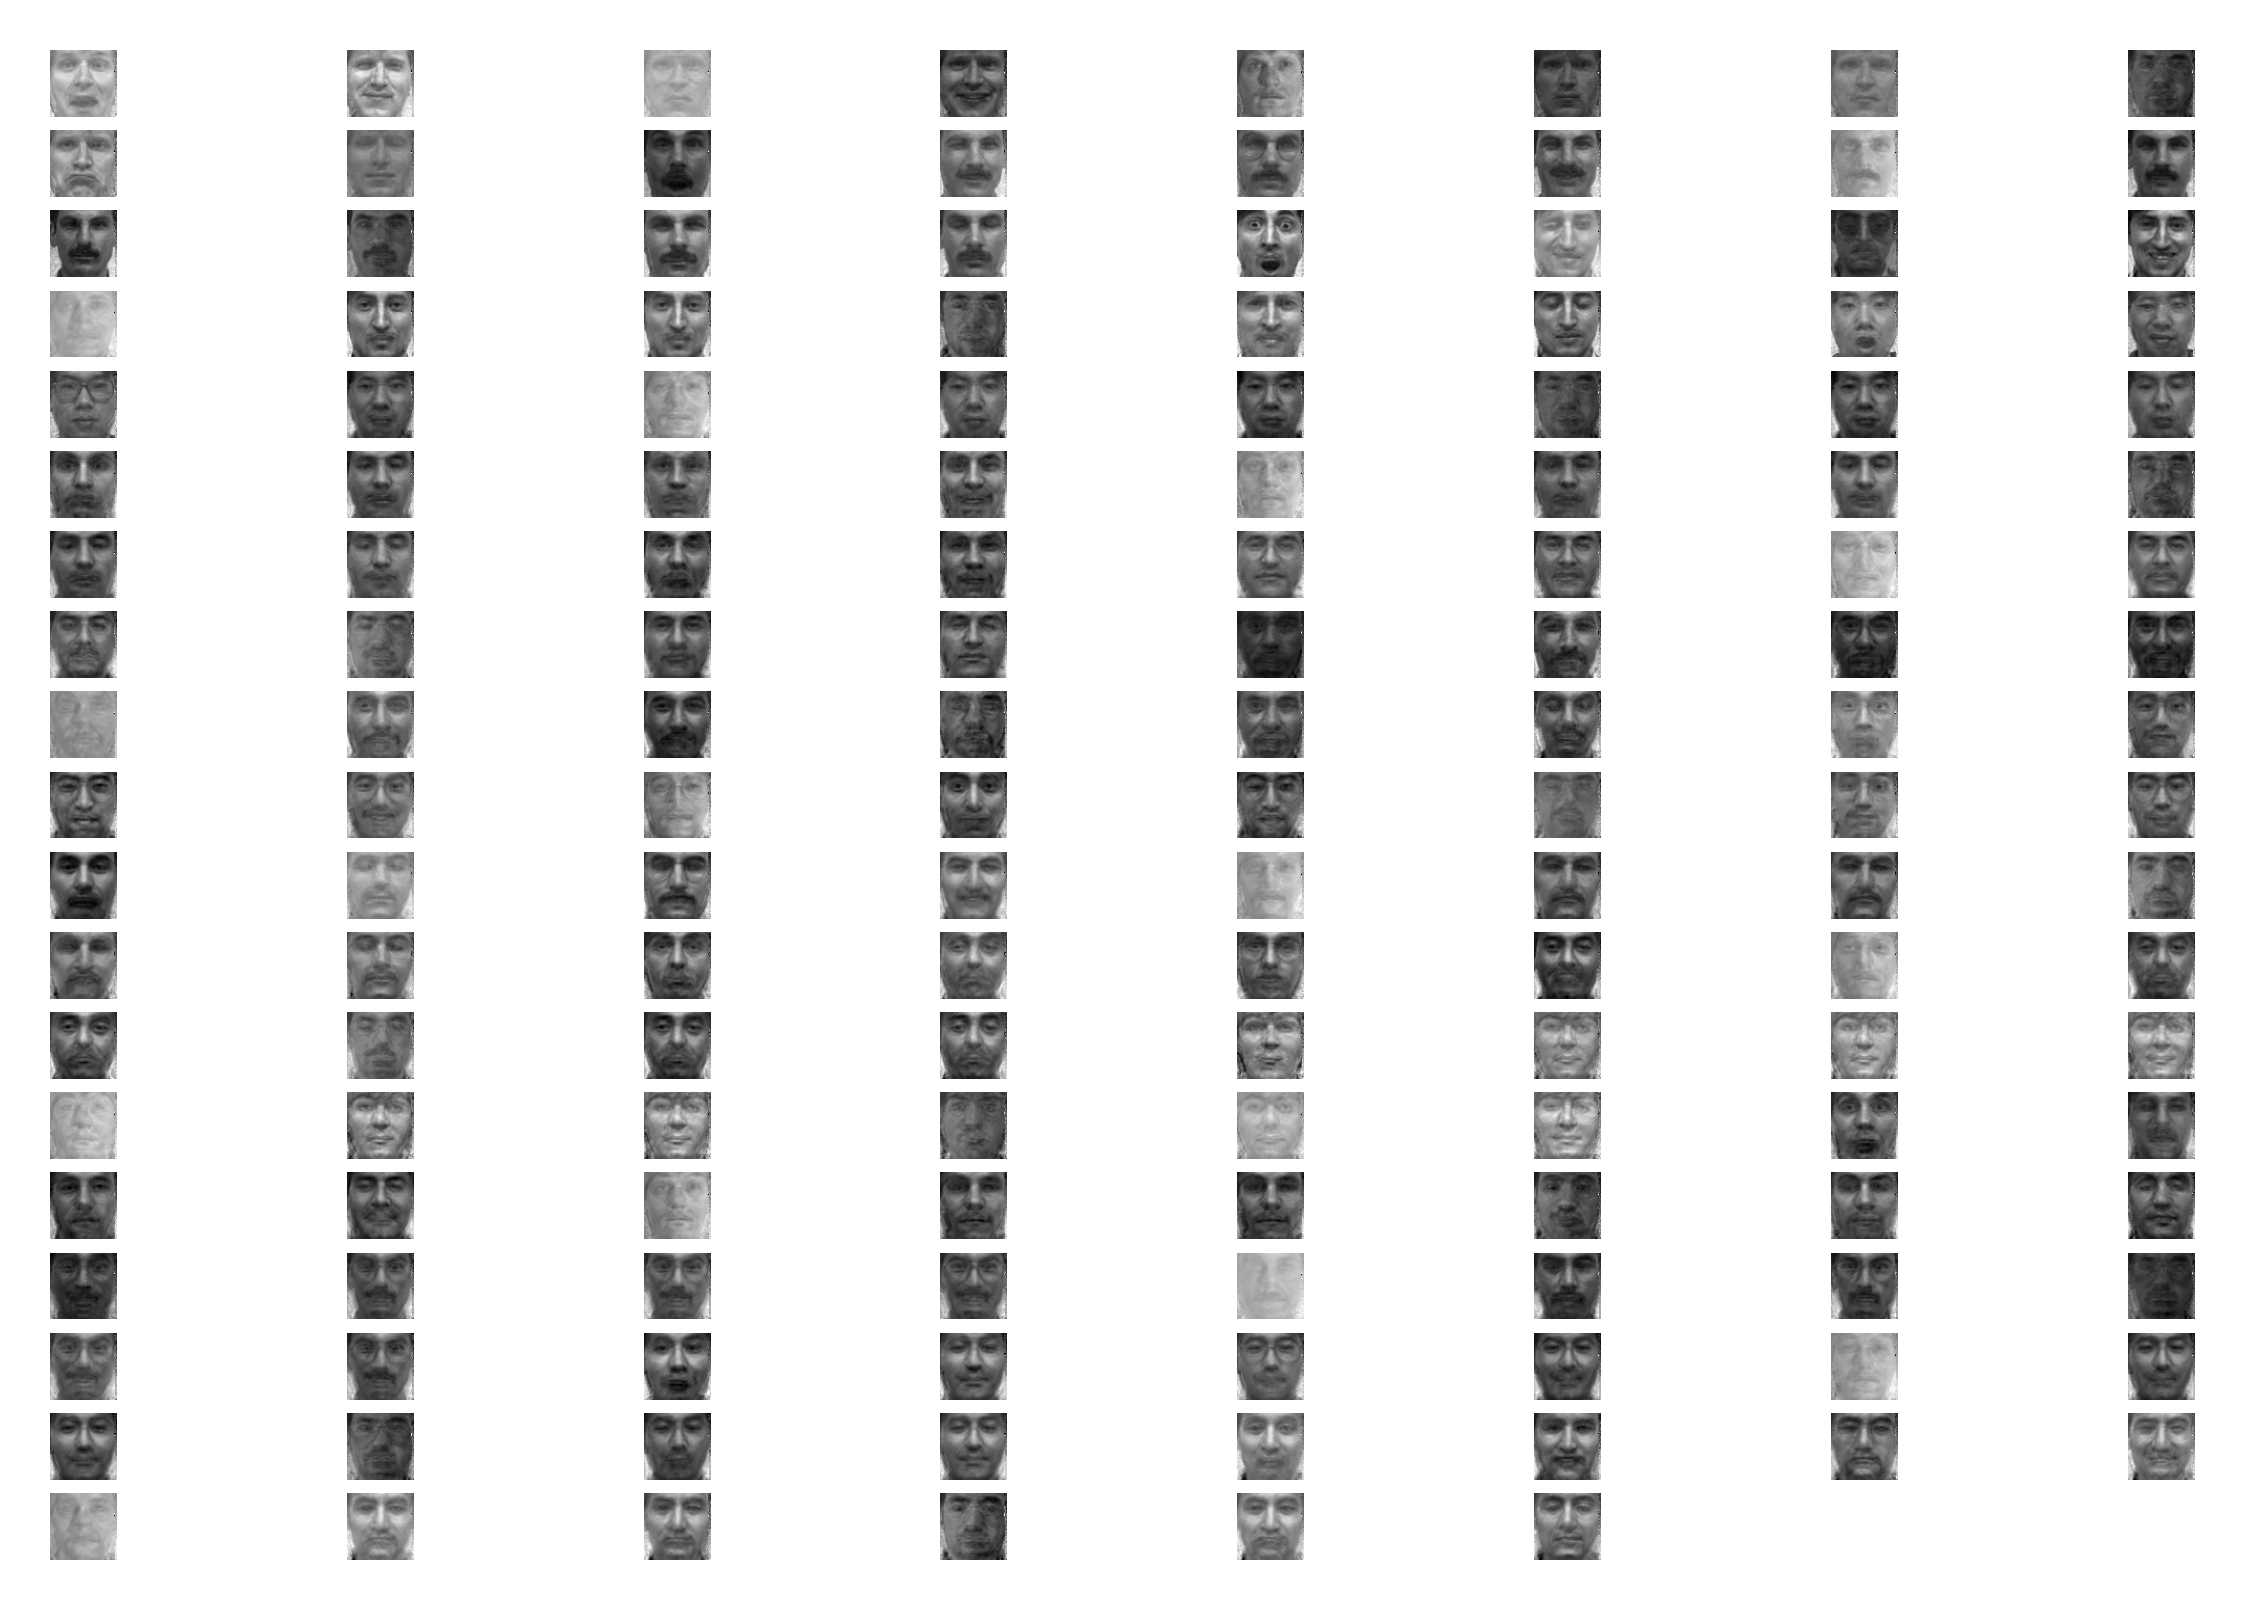

In [9]:


n_features_img, num_examples = train_X.shape
mean_img = np.array([np.mean(train_X.T[:,i]) for i in range(n_features_img)])
#to get the eigenface
new_features_img = np.array([dic_img[e] for e in Yale_val_sort[:k]])
cen_X_img = train_X.T-mean_img
#generate a low-dimensional representation of data point
data_img=np.dot(cen_X_img,new_features_img.T)
#reconstruct data point from its low-dimensional representation
data_img_recon = np.dot(data_img,new_features_img,)+mean_img

#to demonstrate the images using print_image()
plt.figure(dpi=500)
for i in range(len(data_img_recon)):
    plt.subplot(len(data_img_recon)/8+1,8,i+1)
    print_image(plt,data_img_recon[i],)



### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

[[-1.04561824e+03 -9.95752541e+02  6.79295091e+02  2.79604698e+02
   1.32525222e+02 -1.76316710e+03  1.83628147e+03 -2.53796462e+02
  -7.80996623e+02  2.51374183e+02 -4.40398348e+02 -9.96295473e+02
   1.59388075e+03  1.13747869e+02  1.38931550e+03]
 [ 9.05775344e+02  6.07645040e+02  1.53025274e+02 -4.06908929e+02
  -1.40100403e+02  1.23873323e+03 -1.50777085e+03  1.02222351e+02
   3.80651041e+02  7.03087418e+01  4.15299058e+02  3.39394374e+02
  -1.21223857e+03  1.89356794e+01 -9.64971378e+02]
 [-1.25863070e+02 -4.17185834e+02  5.66085737e+02 -1.48397341e+02
   7.51081258e+01 -4.08024027e+02  7.74869968e+02 -1.49121238e+02
  -3.88195688e+02  3.99481602e+02 -2.20500184e+01 -9.03238253e+00
   6.63369431e+00 -2.41787961e+02  8.74784328e+01]
 [ 1.25160507e+02 -5.48827573e+02  3.03812332e+02 -2.35440171e+02
   2.90004104e+02 -1.06585980e+02  7.69881709e+00 -1.88883371e+01
  -3.57232563e+02  2.67262564e+02  1.79440984e+02  9.31743417e+01
  -8.20618778e+01 -1.06828135e+02  1.89310988e+02]
 [-1

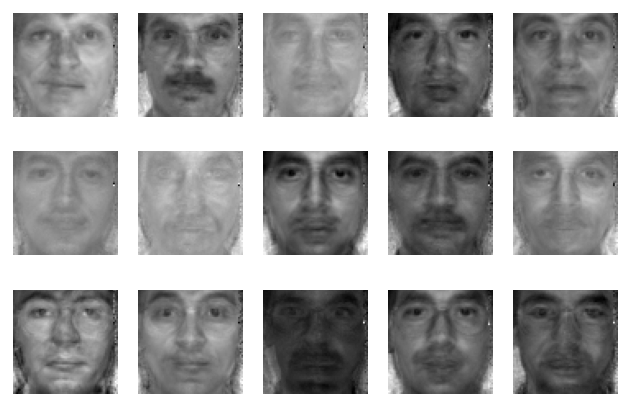

In [11]:
import pandas as pd
n_features_img, num_examples = test_X.shape
mean_img = np.array([np.mean(test_X.T[:,i]) for i in range(n_features_img)])
new_features_img = np.array([dic_img[e] for e in Yale_val_sort[:k]])
cen_X_img = test_X.T-mean_img

data_img=np.dot(cen_X_img,new_features_img.T)
# list all the low-dimensional representations of all the test images in a table in k×15 format where k is 33
print(data_img.T)
data_img_recon_test = np.dot(data_img,new_features_img,)+mean_img
plt.figure(dpi=130)
#display allthe reconstructed test images by using the provided print_image function and arranging 15 test
#images in a 3 × 5 grid;
for i in range(len(data_img_recon_test)):
    plt.subplot(3,5,i+1)
    print_image(plt,data_img_recon_test[i],)

to get the erro of Image Compression compared to original image:
1. calculate the diffenence of two pictures in each pixel 
2. then sum each of the dot value of all difference as sum2
3. sum the dot value of each pixel from original image as sum1
4. the erro is sum sum2/smu1

In [12]:
def error(data,recdata):
    sum1 = 0
    sum2 = 0
    # to calculate the diffenence of two pictures in each pixel
    D_value = data - recdata
    # to calculate the error rate between two images(the information loss rate)
    for i in range(len(data)):
        sum1 += np.dot(data[i],data[i])
        sum2 += np.dot(D_value[i], D_value[i])
    error = sum2/sum1
    return error


shape = (64,64)
error_avg = 0
# for i in range(len(data_img_recon_test)):
#     error_avg += error(test_X.T[i].reshape(shape),data_img_recon_test[i].reshape(shape))
# print(error_avg)
for i in range(len(data_img_recon_test)):
    print(error(test_X.T[i], data_img_recon_test[i]))
    

4.473360878076849
7.054188838463875
6.255247411687156
4.240474019951317
3.3060976577218417
9.263596535024268
10.036884735191432
7.758546634402201
9.054073305635928
7.244771496346266
16.15077573483973
7.860316360442505
13.961192836872454
4.666981205852274
5.584938322194778


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [13]:
train_X, train_y, test_X, test_y = np.load(f'./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

In [14]:
# Comparison
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print("Fitting the classifier to the training set")
#t0 = time()
np.logspace(-9, 3, 13)
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
             'gamma': np.logspace(-9, 3, 13)}
clf=GridSearchCV(SVC(kernel = 'rbf',random_state = 1),param_grid)
clf = clf.fit(train_X.T, train_y)
y_pred = clf.predict(test_X.T)
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y.T, y_pred, labels=range(2)))
print(accuracy_score(test_y, y_pred))

Fitting the classifier to the training set
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24

[[10  2]
 [ 0 12]]
0.9166666666666666


In [15]:
def recon(train_X):
    val,vec = my_dual_pca(train_X.T)
    dic = {}
    s = 0
    k = 1
    for i in range(len(val)):
        dic[val[i]] = vec[i]
        s += val[i]
#         if s/sum(val) >= 0.9:
#             k = i + 1
#             break
    k = 33
    n_features, num_examples = train_X.shape
    mean = np.array([np.mean(train_X.T[:,i]) for i in range(n_features)])
    new_features = np.array([dic[e] for e in val[:k]])
    #print('new_features_img',new_features_img.shape)
    cen_X = train_X.T-mean
    #generate a low-dimensional representation of data point
    data_lowD=np.dot(cen_X,new_features.T)

    #reconstruct data point from its low-dimensional representation
    data_recon = np.dot(data_lowD,new_features)+mean
    return data_recon,k

train_PCA_X ,k_train= recon(train_X)
test_PCA_X ,k_test= recon(test_X)


clf_pca=SVC(kernel = 'rbf',random_state = 1, C = 1)
clf_pca = clf_pca.fit(train_PCA_X, train_y)
y_pca_pred = clf_pca.predict(test_PCA_X)
print('classification_report:'classification_report(test_y, y_pca_pred))
print('confusion_matrix:',confusion_matrix(test_y, y_pca_pred, labels=range(2)))
print('accuracy:',accuracy_score(test_y,y_pca_pred ))

(16, 4096)
(24, 4096)
data_persons_recon (16, 4096) 33
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24

[[ 8  4]
 [ 0 12]]
0.8333333333333334


In [55]:
#
from sklearn.decomposition import PCA
data_pca_train = train_X.T
data_pca_test = test_X.T
pca = PCA(n_components=16).fit(data_pca_train)
train_new = pca.transform(train_X.T)
pca2 = PCA(n_components=16).fit(data_pca_test)
test_new = pca2.transform(test_X.T)
clf_pca_new=GridSearchCV(SVC(kernel = 'rbf',random_state = 1),param_grid)
clf_pca_new = clf_pca_new.fit(train_new, train_y)
y_pca_pred_new = clf_pca_new.predict(test_new)
print(classification_report(test_y, y_pca_pred_new))
print(confusion_matrix(test_y, y_pca_pred_new, labels=range(2)))
print(accuracy_score(test_y,y_pca_pred_new ))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.73      0.67      0.70        12

    accuracy                           0.71        24
   macro avg       0.71      0.71      0.71        24
weighted avg       0.71      0.71      0.71        24

[[9 3]
 [4 8]]
0.7083333333333334


### <span style="color:red">=========== End of Assignment 6 ===========</span>